In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from collections import Counter
import networkx as nx

In [2]:
df = pd.read_csv("drugs_side_effects_drugs_com.csv")
df.head()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [3]:
print("The dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

The dataset has 2931 rows and 17 columns


In [4]:
print(df.columns)

Index(['drug_name', 'medical_condition', 'side_effects', 'generic_name',
       'drug_classes', 'brand_names', 'activity', 'rx_otc',
       'pregnancy_category', 'csa', 'alcohol', 'related_drugs',
       'medical_condition_description', 'rating', 'no_of_reviews', 'drug_link',
       'medical_condition_url'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2888 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   brand_names                    1718 non-null   object 
 6   activity                       2931 non-null   object 
 7   rx_otc                         2930 non-null   object 
 8   pregnancy_category             2702 non-null   object 
 9   csa                            2931 non-null   object 
 10  alcohol                        1377 non-null   object 
 11  related_drugs                  1462 non-null   object 
 12  medical_condition_description  2931 non-null   o

In [6]:
df.head()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [7]:
# Dropping the 'brand_names' column and delete from dataset

In [8]:
df.drop(columns = ['brand_names'], inplace = True)

In [9]:
df.head()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [10]:
# Find duplicate rows based on all columns


In [11]:
duplicate_rows = df[df.duplicated()]

In [12]:
#Count the duplicated rows

In [13]:
duplicate_count = duplicate_rows.shape[0]

In [14]:
print('Count of duplicate rows:', duplicate_count)

Count of duplicate rows: 0


In [15]:
print(duplicate_rows)

Empty DataFrame
Columns: [drug_name, medical_condition, side_effects, generic_name, drug_classes, activity, rx_otc, pregnancy_category, csa, alcohol, related_drugs, medical_condition_description, rating, no_of_reviews, drug_link, medical_condition_url]
Index: []


In [16]:
# Convert 'rating' and 'no_of_reviews' attributes to numeric

In [17]:
df['rating'] = pd.to_numeric(df['rating'], errors = 'coerce')

In [18]:
df['no_of_reviews'] = pd.to_numeric(df['no_of_reviews'], errors = 'coerce')

In [19]:
print(df.dtypes.value_counts())

object     14
float64     2
dtype: int64


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2888 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   activity                       2931 non-null   object 
 6   rx_otc                         2930 non-null   object 
 7   pregnancy_category             2702 non-null   object 
 8   csa                            2931 non-null   object 
 9   alcohol                        1377 non-null   object 
 10  related_drugs                  1462 non-null   object 
 11  medical_condition_description  2931 non-null   object 
 12  rating                         1586 non-null   f

In [21]:
# Convert 'activity' to string, remove whitespace and '%' character, then convert to float and divide by 100

In [22]:
df['activity'] = df['activity'].astype(str).str.replace(r'\s+', '', regex = True).str.rstrip('%').astype('float')/100

In [23]:
print(df['activity'].head())

0    0.87
1    0.82
2    0.48
3    0.41
4    0.39
Name: activity, dtype: float64


In [24]:
# Print the total number of missing values

In [25]:
print("There are {} missing values in this dataset".format(df.isnull().sum().sum()))


There are 6192 missing values in this dataset


In [26]:
print('Number of instances = %d' % (df.shape[0]))

Number of instances = 2931


In [27]:
print('Number of attributes = %d' % (df.shape[1]))


Number of attributes = 16


In [28]:
print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Number of missing values:
	drug_name: 0
	medical_condition: 0
	side_effects: 124
	generic_name: 43
	drug_classes: 82
	activity: 0
	rx_otc: 1
	pregnancy_category: 229
	csa: 0
	alcohol: 1554
	related_drugs: 1469
	medical_condition_description: 0
	rating: 1345
	no_of_reviews: 1345
	drug_link: 0
	medical_condition_url: 0


In [29]:
# In the alcohol column we have X and null(NaN) values, because the drug can interact with alcohol or not.


In [30]:
df['alcohol'] = df['alcohol'].replace(np.NaN,'0')

In [31]:
df['alcohol'] = df['alcohol'].replace({'x' : 1})

In [32]:
# Fill the null values in 'side_effects' and 'related_drugs' with no

In [33]:
df['side_effects'] = df['side_effects'].fillna('Unknown')

In [34]:
df['related_drugs'] = df['related_drugs'].fillna('Unknown')

In [35]:
# Fill the null values with 0 as a base for 'rating' and 'no_of_reviews' columns

In [36]:
df['rating'] = df['rating'].fillna('0')

In [37]:
df['no_of_reviews'] = df['no_of_reviews'].fillna('0')

In [38]:
# Fill the null values with undefined for 'generic_name'


In [39]:
df['generic_name'] = df['generic_name'].replace(np.NaN,'Unknown')

In [40]:
# Fill the null values with undefined for 'drug_classes'


In [41]:
df['drug_classes'] = df['drug_classes'].replace(np.NaN,'Unknown')

In [42]:
# For these two columns we already have some category values from dataset's description
# For Rx_OTC

In [43]:
df['rx_otc'].unique()

array(['Rx', 'Rx/OTC', 'OTC', nan], dtype=object)

In [44]:
# For pregnancy categories


In [45]:
df['pregnancy_category'].unique()

array(['D', 'C', 'X', 'B', 'N', nan, 'A'], dtype=object)

In [46]:
# Fill the null value with Unknown as a basic value


In [47]:
df['rx_otc'] = df['rx_otc'].replace(np.NaN,'Unknown')


In [48]:
# Fill the null value with Unknown as a basic value


In [49]:
df['pregnancy_category'] = df['pregnancy_category'].replace(np.NaN,'Unknown')


In [50]:
df['rating'] = pd.to_numeric(df['rating'], errors = 'coerce')

In [51]:
df['no_of_reviews'] = pd.to_numeric(df['no_of_reviews'], errors = 'coerce')

In [52]:
print(df.head())

        drug_name medical_condition  \
0     doxycycline              Acne   
1  spironolactone              Acne   
2     minocycline              Acne   
3        Accutane              Acne   
4     clindamycin              Acne   

                                        side_effects         generic_name  \
0  (hives, difficult breathing, swelling in your ...          doxycycline   
1  hives ; difficulty breathing; swelling of your...       spironolactone   
2  skin rash, fever, swollen glands, flu-like sym...          minocycline   
3  problems with your vision or hearing; muscle o...  isotretinoin (oral)   
4  hives ; difficult breathing; swelling of your ...  clindamycin topical   

                                        drug_classes  activity rx_otc  \
0         Miscellaneous antimalarials, Tetracyclines      0.87     Rx   
1  Aldosterone receptor antagonists, Potassium-sp...      0.82     Rx   
2                                      Tetracyclines      0.48     Rx   
3  Miscell

In [53]:
dfs = df.copy()

In [54]:
print("There are {} missing values in this dataset".format(df.isnull().sum().sum()))


There are 0 missing values in this dataset


In [55]:
print('Number of instances = %d' % (df.shape[0]))


Number of instances = 2931


In [56]:
print('Number of attributes = %d' % (df.shape[1]))


Number of attributes = 16


In [57]:
print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Number of missing values:
	drug_name: 0
	medical_condition: 0
	side_effects: 0
	generic_name: 0
	drug_classes: 0
	activity: 0
	rx_otc: 0
	pregnancy_category: 0
	csa: 0
	alcohol: 0
	related_drugs: 0
	medical_condition_description: 0
	rating: 0
	no_of_reviews: 0
	drug_link: 0
	medical_condition_url: 0


In [58]:
df_version2 = df.copy()

In [59]:
print(df_version2.head())


        drug_name medical_condition  \
0     doxycycline              Acne   
1  spironolactone              Acne   
2     minocycline              Acne   
3        Accutane              Acne   
4     clindamycin              Acne   

                                        side_effects         generic_name  \
0  (hives, difficult breathing, swelling in your ...          doxycycline   
1  hives ; difficulty breathing; swelling of your...       spironolactone   
2  skin rash, fever, swollen glands, flu-like sym...          minocycline   
3  problems with your vision or hearing; muscle o...  isotretinoin (oral)   
4  hives ; difficult breathing; swelling of your ...  clindamycin topical   

                                        drug_classes  activity rx_otc  \
0         Miscellaneous antimalarials, Tetracyclines      0.87     Rx   
1  Aldosterone receptor antagonists, Potassium-sp...      0.82     Rx   
2                                      Tetracyclines      0.48     Rx   
3  Miscell

In [60]:
# Save the data


In [61]:
df_version2.to_csv('drugs_side_effects_drugs_com_version2.csv', index=False)


In [62]:
# Read the new version of dataset


In [63]:
df_ver3 = pd.read_csv('drugs_side_effects_drugs_com_version2.csv')


In [64]:
df_ver3['pregnancy_category'].unique()

array(['D', 'C', 'X', 'B', 'N', 'Unknown', 'A'], dtype=object)

In [65]:
df_ver3['csa'].unique()

array(['N', '2', '4', 'U', 'M', '5', '3'], dtype=object)

In [66]:
df_ver3['rx_otc'].unique()

array(['Rx', 'Rx/OTC', 'OTC', 'Unknown'], dtype=object)

In [67]:
df_ver3['generic_name'].unique()

array(['doxycycline', 'spironolactone', 'minocycline', ...,
       'fenfluramine', 'phendimetrazine tartrate', 'setmelanotide'],
      dtype=object)

In [68]:
df_ver3['medical_condition'].unique()

array(['Acne', 'ADHD', 'AIDS/HIV', 'Allergies', "Alzheimer's", 'Angina',
       'Anxiety', 'Asthma', 'Bipolar Disorder', 'Bronchitis', 'Cancer',
       'Cholesterol', 'Colds & Flu', 'Constipation', 'COPD', 'Covid 19',
       'Depression', 'Diabetes (Type 1)', 'Diabetes (Type 2)', 'Diarrhea',
       'Eczema', 'Erectile Dysfunction', 'Gastrointestinal',
       'GERD (Heartburn)', 'Gout', 'Hair Loss', 'Hayfever', 'Herpes',
       'Hypertension', 'Hypothyroidism', 'IBD (Bowel)', 'Incontinence',
       'Insomnia', 'Menopause', 'Migraine', 'Osteoarthritis',
       'Osteoporosis', 'Pain', 'Pneumonia', 'Psoriasis',
       'Rheumatoid Arthritis', 'Schizophrenia', 'Seizures', 'Stroke',
       'Swine Flu', 'UTI', 'Weight Loss'], dtype=object)

In [69]:
df_ver3.head(15)

,drug_name,medical_condition,side_effects,generic_name,drug_classes,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines",0.87,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...",0.82,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,0.48,Rx,D,N,0,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",0.41,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives",0.39,Rx,B,N,0,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html
5,Aldactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...",0.35,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.6,8.0,https://www.drugs.com/aldactone.html,https://www.drugs.com/condition/acne.html
6,tretinoin,Acne,hives ; difficult breathing; swelling of your ...,tretinoin topical,Topical acne agents,0.30,Rx,C,N,0,Unknown,Acne Other names: Acne Vulgaris; Blackheads; B...,7.7,439.0,https://www.drugs.com/mtm/tretinoin-topical.html,https://www.drugs.com/condition/acne.html
7,isotretinoin,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",0.26,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,8.0,999.0,https://www.drugs.com/mtm/isotretinoin.html,https://www.drugs.com/condition/acne.html
8,Bactrim,Acne,"skin rash, fever, swollen glands, joint pain, ...",sulfamethoxazole and trimethoprim,Sulfonamides,0.20,Rx,D,N,X,Unknown,Acne Other names: Acne Vulgaris; Blackheads; B...,8.5,96.0,https://www.drugs.com/bactrim.html,https://www.drugs.com/condition/acne.html
9,Retin-A,Acne,hives; difficult breathing; swelling of your f...,Retin-A,Topical acne agents,0.17,Rx,C,N,0,Unknown,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,86.0,https://www.drugs.com/retin-a.html,https://www.drugs.com/condition/acne.html


In [70]:
df_ver3['rating'].unique()

array([ 6.8,  7.2,  5.7,  7.9,  7.4,  7.6,  7.7,  8. ,  8.5,  7.8,  6. ,
        7.3,  6.3,  8.4,  7.5, 10. ,  6.9,  8.3,  9. ,  8.2,  5. ,  8.8,
        0. ,  6.7,  7. ,  6.4,  6.6,  8.7,  8.6,  8.1,  4.8,  5.4,  9.5,
        5.2,  2. ,  3.8,  7.1,  8.9,  2.6,  4.4,  6.5,  3.7,  6.1,  9.4,
        5.8,  5.1,  5.5,  4.5,  9.1,  1. ,  5.9,  4. ,  9.3,  4.7,  4.6,
        4.9,  3.3,  3.9,  9.7,  6.2,  2.1,  9.8,  5.3,  5.6,  2.5,  4.2,
        3.6,  4.3,  3. ,  9.2,  2.9,  2.8,  9.6,  3.2,  1.8,  2.3,  3.1,
        3.4,  3.5,  4.1,  1.7,  2.7,  1.5,  1.1,  9.9,  2.4])

In [71]:
df_ver3['drug_name'].unique()

array(['doxycycline', 'spironolactone', 'minocycline', ..., 'Fendique ER',
       'Imcivree', 'setmelanotide'], dtype=object)

In [72]:
# Distribution of Drug Ratings

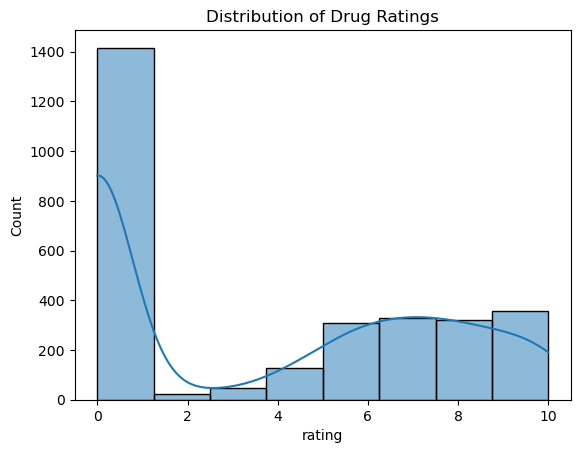

In [73]:
sns.histplot(df_ver3['rating'], bins=8, kde=True)
plt.title('Distribution of Drug Ratings')
plt.show()

In [74]:
# Drugs by category

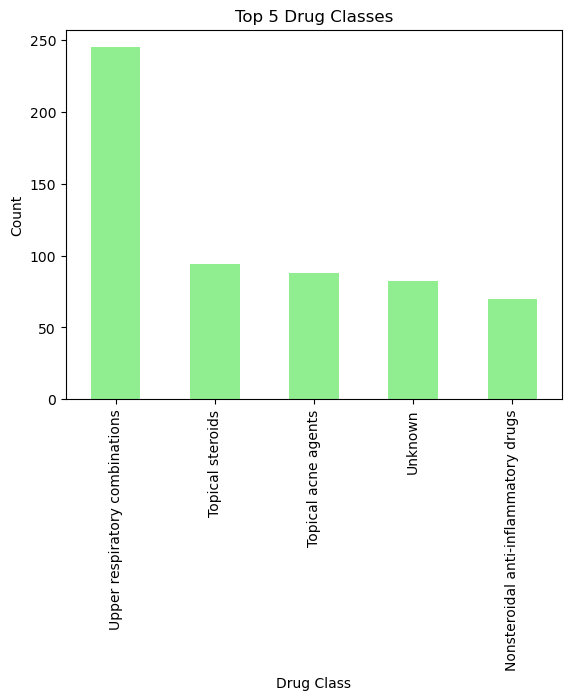

In [75]:
drug_classes_count = df_ver3['drug_classes'].value_counts().head(5)
drug_classes_count.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Drug Classes')
plt.xlabel('Drug Class')
plt.ylabel('Count')
plt.show()

In [76]:
df_ver3['side_effects'].unique()

array(['(hives, difficult breathing, swelling in your face or throat) or a severe skin reaction (fever, sore throat, burning in your eyes, skin pain, red or purple skin rash that spreads and causes blistering and peeling). Seek medical treatment if you have a serious drug reaction that can affect many parts of your body. Symptoms may include: skin rash, fever, swollen glands, flu-like symptoms, muscle aches, severe weakness, unusual bruising, or yellowing of your skin or eyes. This reaction may occur several weeks after you began using doxycycline. Doxycycline may cause serious side effects. Call your doctor at once if you have: severe stomach pain, diarrhea that is watery or bloody; throat irritation, trouble swallowing; chest pain, irregular heart rhythm, feeling short of breath; little or no urination; low white blood cell counts - fever, chills, swollen glands, body aches, weakness, pale skin, easy bruising or bleeding; severe headaches, ringing in your ears, dizziness, nausea, vis

In [77]:
all_side_effects = ', '.join(df_ver3['side_effects'].dropna())

In [78]:
side_effects_list = all_side_effects.split(', ')
side_effects_count = Counter(side_effects_list)

In [79]:
top_side_effects = side_effects_count.most_common(15)
side_effects_df_ver3 = pd.DataFrame(top_side_effects, columns=['Side Effect', 'Count'])

In [80]:
# Top 15 most common side effects

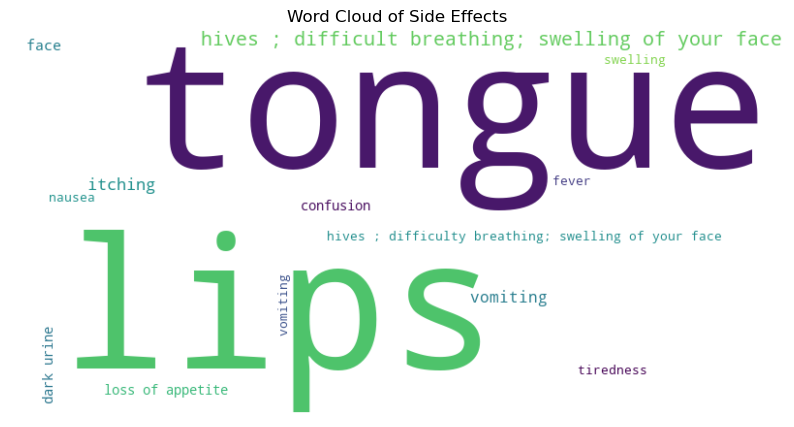

In [81]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_side_effects))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Side Effects')
plt.show()

In [82]:
df_ver3['pregnancy_category'].unique()

array(['D', 'C', 'X', 'B', 'N', 'Unknown', 'A'], dtype=object)

In [83]:
 category_counts = df_ver3['pregnancy_category'].fillna('Unknown').value_counts()

In [84]:
category_df = category_counts.reset_index()
category_df.columns = ['Pregnancy Category', 'Count']

In [85]:
# pregnancy_category Bar plot 

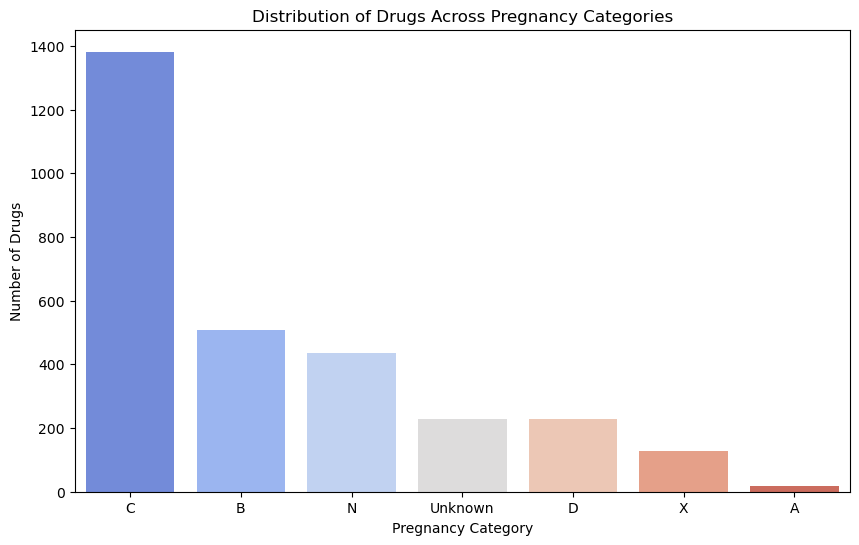

In [86]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Pregnancy Category', y='Count', data=category_df, palette='coolwarm')
plt.title('Distribution of Drugs Across Pregnancy Categories')
plt.xlabel('Pregnancy Category')
plt.ylabel('Number of Drugs')
plt.show()

In [87]:
drug_types = df_ver3['rx_otc'].value_counts()

In [88]:
# Prescription vs. Over-the-counter (OTC) drugs

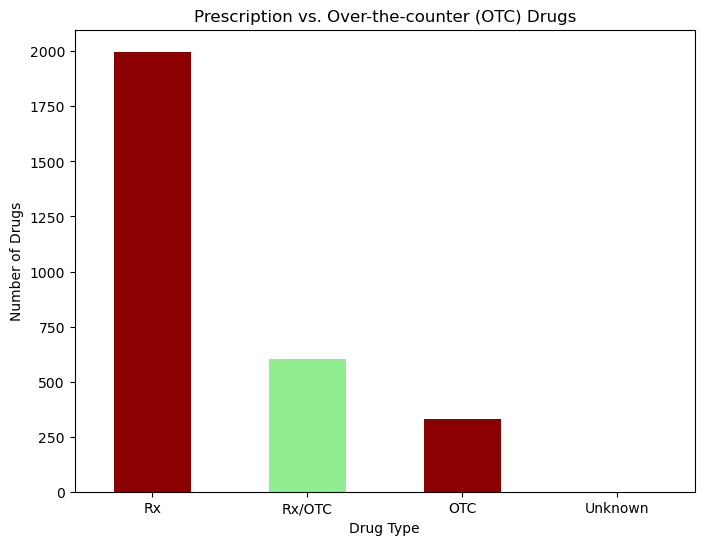

In [89]:
plt.figure(figsize=(8, 6))
drug_types.plot(kind='bar', color=['darkred', 'lightgreen'])
plt.title('Prescription vs. Over-the-counter (OTC) Drugs')
plt.xlabel('Drug Type')
plt.ylabel('Number of Drugs')
plt.xticks(rotation=0)   
plt.show()

In [90]:
# drug ratings VS number of reviews.

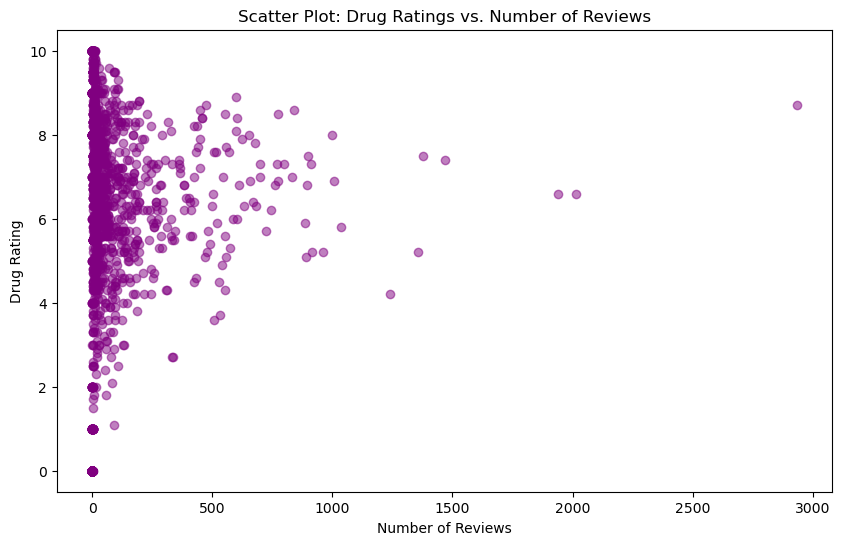

In [91]:
plt.figure(figsize=(10, 6))
plt.scatter(df_ver3['no_of_reviews'], df_ver3['rating'], color='purple', alpha=0.5)
plt.title('Scatter Plot: Drug Ratings vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Drug Rating')
plt.show()   

In [92]:
def has_hives(text):
 return 'hives' in text.lower()
df_ver3['Hives'] = df_ver3['side_effects'].apply(has_hives)

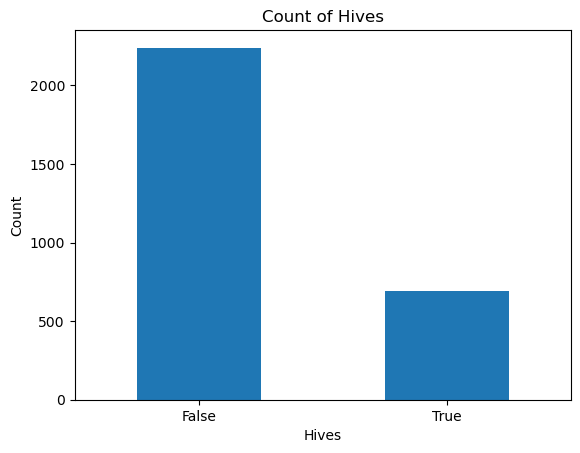

In [93]:
# Plot count of Hives
df_ver3['Hives'].value_counts().plot(kind='bar')
plt.title('Count of Hives')
plt.xlabel('Hives')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

In [94]:
def is_usc(text):
    return 'Upper respiratory combinations' in text
df_ver3['Upper respiratory combinations'] = df_ver3['drug_classes'].apply(is_usc)

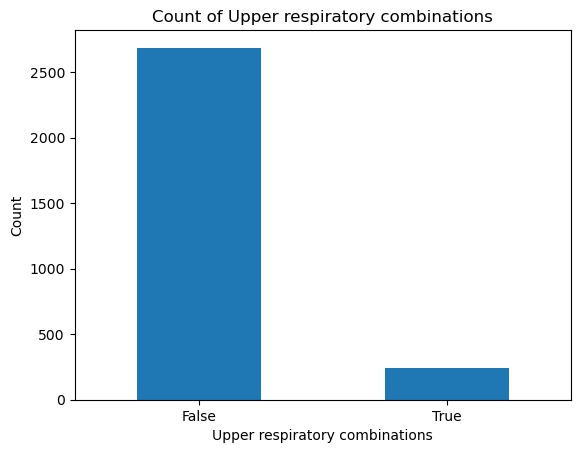

In [95]:
# Plot count of Upper respiratory combinations
df_ver3['Upper respiratory combinations'].value_counts().plot(kind='bar')
plt.title('Count of Upper respiratory combinations')
plt.xlabel('Upper respiratory combinations')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

In [96]:
def has_colds_and_flu(text):
    return 'Colds & Flu' in text
df_ver3['Colds & Flu'] = df_ver3['medical_condition'].apply(has_colds_and_flu)

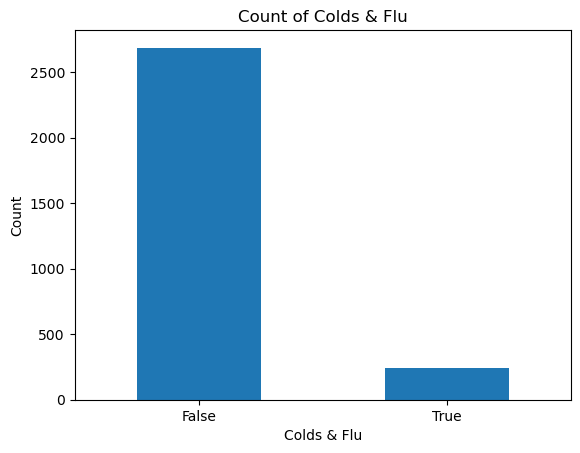

In [97]:
# Plot count of Colds & Flu
df_ver3['Colds & Flu'].value_counts().plot(kind='bar')
plt.title('Count of Colds & Flu')
plt.xlabel('Colds & Flu')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()